# Python Computation Stress

In [1]:
# Import modules
import decimal
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
import time
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression

In [2]:
print(f"Tensorflow version: {tf.__version__}")
print(f"Tensorflow Datasets version: {tfds.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Numpy version: {np.__version__}")

Tensorflow version: 2.1.0
Tensorflow Datasets version: 3.1.0
Matplotlib version: 3.3.4
Numpy version: 1.18.1


In [3]:
print(f"C3 Server version: {c3.Cluster.hosts()[0].serverInfo['buildCITag']}")

C3 Server version: 7.24.0.760-1


# Plain Python Computation

In [4]:
# Python Computation Stress Cell

def compute_pi(n):
    decimal.getcontext().prec = n + 1
    C = 426880 * decimal.Decimal(10005).sqrt()
    K = 6.
    M = 1.
    X = 1
    L = 13591409
    S = L

    for i in range(1, n):
        M = M * (K ** 3 - 16 * K) / ((i + 1) ** 3)
        L += 545140134
        X *= -262537412640768000
        S += decimal.Decimal(M * L) / X

        pi = C / S
    return pi

compute_pi(4000)

Decimal('3.14159265358974158651772731545786503578025269126156317994328821479580863053138964218527493123080443045441911707414796710536608397671233354221832118027424988314587314345442844600858008803434121947337300015144353272150414186517867396639314294152016686287450979761154847714765508578768854002572836161760090315077518472584815419027881837779162970974862912524446434262083284333049058929151102700293531289663044800506314130995161140240669125486245152068299229838935099579341481520480414766865507364200633241210408199058044453264239667487597369637207375458850871393254190911844726697311143924141130482527045172486271800603012509761935486165221506511508257092306829552058776548815632852350963944621764622765090365581962817931455102598790410386487060084758280525302592670615712953413872404457363291263638572025448235234965703663075859914895459155492085652111791683155421121392898093891386234720016576578933404959586636118388137238304338062508472195796453191901853059193597406474758648147904286661486

# Data Preparation

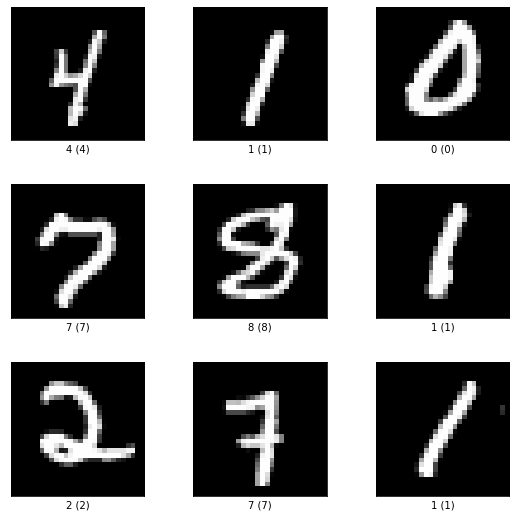

In [5]:
# Plain Tensorflow training cell
ds, info = tfds.load('mnist', split='train', with_info=True)

# Make C3 logging quiet
import logging
logging.getLogger('c3.Client').propagate = False

fig = tfds.show_examples(ds, info)

In [6]:
# From MNIST tensorflow tutorial
# Load dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True,
)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(normalize_img)
ds_test = ds_test.map(normalize_img)

# collect all examples and stack'em up for numpy arrays
X_train = []
Y_train = []
for x, y in ds_train:
    X_train.append(x.numpy())
    Y_train.append(y.numpy())

X_train = np.stack(X_train, axis=0)
Y_train = np.stack(Y_train, axis=0)

# Flatten X to 2 dimensions
X_train = X_train.reshape((X_train.shape[0], -1))
# Add category dimension to Y_train
Y_train = Y_train.reshape((Y_train.shape[0], 1))

X_test = []
Y_test = []
for x, y in ds_test:
    X_test.append(x.numpy())
    Y_test.append(y.numpy())

# Flatten X to 2 dimensions
X_test = np.stack(X_test, axis=0)
# Add category dimension to Y_train
Y_test = np.stack(Y_test, axis=0)

X_test = X_test.reshape((X_test.shape[0], -1))
Y_test = Y_test.reshape((X_test.shape[0], 1))

DS_train = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
DS_test = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

# Plain Tensorflow

In [7]:
# model evaluation function

def keras_model(model, X):
    return model(X)

def sklearn_model(model, X):
    return model.predict_proba(X)

In [8]:
batch_size = 32

In [9]:
# Dict 
model_dict = {}

In [10]:
# Logistic Regression

model = Pipeline([('logreg', LogisticRegression(max_iter=1000))])

model.fit(X_train[:10000], Y_train[:10000])

model_dict['Logistic Regression'] = (model, sklearn_model)

/home/c3/.conda/envs/py-dataanalysis_1_0_0/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [11]:
# Simple sequential model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128,activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(10)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    DS_train.batch(batch_size),
    epochs=6,
    validation_data=DS_test.batch(batch_size),
)

model_dict['Dense'] = (model, keras_model)

Train for 1875 steps, validate for 313 steps
Epoch 1/6
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2585 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.1349 - val_sparse_categorical_accuracy: 0.9595
Epoch 2/6
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1131 - sparse_categorical_accuracy: 0.9669 - val_loss: 0.1029 - val_sparse_categorical_accuracy: 0.9692 loss: 0.1131 - sparse_categorical_accuracy: 0.96
Epoch 3/6
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0772 - sparse_categorical_accuracy: 0.9774 - val_loss: 0.0900 - val_sparse_categorical_accuracy: 0.9729
Epoch 4/6
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0565 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.0844 - val_sparse_categorical_accuracy: 0.9747
Epoch 5/6
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0425 - sparse_categorical_accuracy: 0.9879 - val_loss: 0.0815 - val_sparse_categorical_accuracy

In [12]:
# Support Vector Classifier

model = Pipeline([('svc', SVC(kernel='poly', probability=True))])

# We train on fewer examples for SVC because of large memory requirements of SVC
model.fit(X_train, Y_train)

model_dict['SVC'] = (model, sklearn_model)

/home/c3/.conda/envs/py-dataanalysis_1_0_0/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [13]:
# Simple CNN (Currently CNN model crashes the python kernel when evaluating on Cluster 2)
model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

model.fit(
    DS_train.batch(batch_size),
    epochs=6,
    validation_data=DS_test.batch(batch_size),
)

model_dict['CNN'] = (model, keras_model)

Train for 1875 steps, validate for 313 steps
Epoch 1/6
1875/1875 [==============================] - 187s 100ms/step - loss: 0.1561 - sparse_categorical_accuracy: 0.9526 - val_loss: 0.0749 - val_sparse_categorical_accuracy: 0.9767
Epoch 2/6
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0605 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.0691 - val_sparse_categorical_accuracy: 0.9780
Epoch 3/6
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0405 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.0745 - val_sparse_categorical_accuracy: 0.9783
Epoch 4/6
1875/1875 [==============================] - 199s 106ms/step - loss: 0.0275 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.0719 - val_sparse_categorical_accuracy: 0.9810
Epoch 5/6
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0174 - sparse_categorical_accuracy: 0.9955 - val_loss: 0.0785 - val_sparse_categorical_accuracy: 0.9803
Epoch 6/6
1875/1875 [=========

In [14]:
for model_key in model_dict:
    metric = tf.keras.metrics.SparseCategoricalAccuracy()
    model = model_dict[model_key][0]
    eval_function = model_dict[model_key][1]
    Y = eval_function(model, X_test)
    try:
        Y = Y.numpy()
    except:
        pass
    metric.update_state(Y_test, Y)
    print(f"Model {model_key} achieves {metric.result().numpy()*100:.2f}% Accuracy")

Model Logistic Regression achieves 90.49% Accuracy
Model Dense achieves 97.65% Accuracy
Model SVC achieves 97.89% Accuracy
Model CNN achieves 97.94% Accuracy


# Tensorflow with C3

In [15]:
# C3 Tensorflow training cell

# Put data onto the C3 platform
X_train_spec = c3.FileSourceCreateSpec(
    locationPrefix="StressTest"
)
X_train_source_spec = c3.FileSourceSpec.createFromNumpy(X_train, X_train_spec)
Y_train_spec = c3.FileSourceCreateSpec(
    locationPrefix="StressTest"
)
Y_train_source_spec = c3.FileSourceSpec.createFromNumpy(Y_train, Y_train_spec)
X_test_spec = c3.FileSourceCreateSpec(
    locationPrefix="StressTest"
)
X_test_source_spec = c3.FileSourceSpec.createFromNumpy(X_test, X_test_spec)
Y_test_spec = c3.FileSourceCreateSpec(
    locationPrefix="StressTest"
)
Y_test_source_spec = c3.FileSourceSpec.createFromNumpy(Y_test, Y_test_spec)

In [16]:
pipeline_dict = {}

In [17]:
# Logistic Regression Pipeline

lrPipe = c3.SklearnPipe(
    name = "logisticRegression",
    technique=c3.SklearnTechnique(
        name = "linear_model.LogisticRegression",
        # calls predict function
        processingFunctionName="predict_proba",
        hyperParameters={"random_state": 42}
    )
)

logisticRegression = c3.MLSerialPipeline(
    name = "lrPipeline",
    steps = [
        c3.MLStep(
            name="lrStep",
            pipe=lrPipe
        )
    ],
    scoringMetrics=c3.MLScoringMetric.toScoringMetricMap(scoringMetricList=[c3.MLAccuracyMetric()])
)
pipeline_dict['Logistic Regression'] = logisticRegression

In [18]:
# Dense sequential model pipeline
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128,activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(10)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Build keras pipeline
technique = c3.KerasTechnique(numEpochs=6, batchSize=batch_size)
dense_keras_pipe = c3.KerasPipe(name='denseClassifier',
                          technique=technique).upsertNativeModel(model, upsertModelDefOnly=False)

# Build final pipeline
dense_keras_pipeline = c3.MLSerialPipeline(
    name = "kerasPipeline",
    steps=[
        c3.MLStep(name="classifier",
                  pipe=dense_keras_pipe)],
    scoringMetrics=c3.MLScoringMetric.toScoringMetricMap(scoringMetricList=[c3.MLAccuracyMetric()])
)
pipeline_dict['Dense'] = dense_keras_pipeline

In [19]:
# SVC pipeline
svcPipe = c3.SklearnPipe(
    name = "svcPipe",
    technique=c3.SklearnTechnique(
        name = "svm.SVC",
        # calls predict function
        processingFunctionName="predict_proba",
        hyperParameters={"kernel": "poly", "probability": True}
    )
)

svcPipeline = c3.MLSerialPipeline(
    name = "svcPipeline",
    steps = [
        c3.MLStep(
            name="svcStep",
            pipe=svcPipe
        )
    ],
    scoringMetrics=c3.MLScoringMetric.toScoringMetricMap(scoringMetricList=[c3.MLAccuracyMetric()])
)
pipeline_dict['SVC'] = svcPipeline

In [20]:
# Simple CNN 
model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [21]:
# Build keras pipeline
technique = c3.KerasTechnique(numEpochs=6, batchSize=batch_size)
cnn_keras_pipe = c3.KerasPipe(name='cnnClassifier',
                          technique=technique).upsertNativeModel(model, upsertModelDefOnly=False)

In [22]:
# Build final pipeline
cnn_keras_pipeline = c3.MLSerialPipeline(
    name = "cnnKerasPipeline",
    steps=[
        c3.MLStep(name="classifier",
                  pipe=cnn_keras_pipe)],
#    scoringMetrics=c3.MLScoringMetric.toScoringMetricMap(scoringMetricList=[c3.MLBinaryAccuracyMetric(threshold=0.5)])
)
pipeline_dict['CNN'] = cnn_keras_pipeline

# Save untrained models

In [23]:
# Upsert untrained pipelines
for pipe_name in pipeline_dict:
    pipe = pipeline_dict[pipe_name]
    # Upsert, and get id back
    pipeline_dict[pipe_name] = pipe.upsert()

# Run Train Job
Run a map reduce job to train pipelines in parallel

In [24]:
# DynMapReduce

def mapper(batch, objs, job):
    params = job.context.value
    untrained_to_trained_id = {}
    for pipe in objs:
        trained_pipeline = c3.MLSerialPipeline.get(pipe.id).train(
            params['input'], targetOutput=params['targetOutput'])
        trained_pipeline.upsert()
        untrained_to_trained_id[pipe.id] = trained_pipeline.id
    return untrained_to_trained_id

def reducer(key, interValues, job):
    return interValues

pipe_ids_to_train = [pipeline_dict[pipe_name].id for pipe_name in pipeline_dict]

job = c3.DynMapReduce(
    targetType="MLSerialPipeline",
    filter=f"intersects(id, {pipe_ids_to_train})",
    mapLambda=c3.Lambda.fromPython(mapper),
    reduceLambda=c3.Lambda.fromPython(reducer),
    context = c3.MappObj(value={
        'input': c3.Dataset.fromNdArrayStreamable(X_train_source_spec),
        'targetOutput': c3.Dataset.fromNdArrayStreamable(Y_train_source_spec)
    }),
).create()
job.start()

c3.MapReduceStatus(
 started=datetime.datetime(2021, 11, 4, 16, 11, 44, tzinfo=datetime.timezone.utc),
 startedby='mkrafcz2@illinois.edu',
 status='running',
 step='initial')

In [25]:
start = time.time()
while job.status().status == 'running':
    time.sleep(10)
end = time.time()
print(f"Job took {end-start:.2f}s!")

Job took 3482.28s!


# Fetch trained models, and test

In [26]:
# Get trained pipes
trained_pipes = {}
res = job.results()
for pipe_name in pipeline_dict:
    upserted_pipe = pipeline_dict[pipe_name]
    trained_pipe_id = res[upserted_pipe.id][0]
    trained_pipes[pipe_name] = c3.MLSerialPipeline.get(trained_pipe_id)

In [27]:
# Summarize Trained pipelines

scores_dict = {}

Y_test_2 = np.squeeze(Y_test)

for pipeline_name in trained_pipes:
    pipeline = trained_pipes[pipeline_name]
    Y_pred_res = pipeline.process(c3.Dataset.fromNdArrayStreamable(X_test_source_spec))
    Y_pred = c3.Dataset.toNumpy(dataset=Y_pred_res)
    Y_pred = np.argmax(Y_pred, axis=1)
    num_count = sum(Y_pred == Y_test_2)
    scores_dict[pipeline_name] = num_count/Y_test.shape[0]

for pipeline_name in scores_dict:
    print(f"Pipeline {pipeline_name} achieves accuracy {scores_dict[pipeline_name]*100:.2f}%")

Pipeline Logistic Regression achieves accuracy 92.56%
Pipeline Dense achieves accuracy 92.48%
Pipeline SVC achieves accuracy 97.89%
Pipeline CNN achieves accuracy 96.16%


In [28]:
#trainedLr.score(
#    input=c3.Dataset.fromNdArrayStreamable(X_test_source_spec),
#    targetOutput=c3.Dataset.fromNdArrayStreamable(Y_test_source_spec),
#    spec=c3.MLScoreSpec())

# Cleanup

In [29]:
# Cleanup numpy datasets
for spec in [X_train_source_spec, Y_train_source_spec, X_test_source_spec, Y_test_source_spec]:
    spec.cleanUp()
    spec.remove()

In [30]:
# Cleanup untrained pipelines
for pipe_name in pipeline_dict:
    pipeline_dict[pipe_name].remove()

# Cleanup trained pipelines
for pipe_name in trained_pipes:
    trained_pipes[pipe_name].remove()